<a href="https://colab.research.google.com/github/Ritesh-Sil/100-days-of-machine-learning/blob/main/Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the data into dataframe
df_source = pd.read_csv('/content/drive/MyDrive/DataSets/train.csv')

#Copying the data into a new dataframe
df = df_source.copy()


In [4]:
#Checking sample of the data
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1040,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
145,146,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,130000
1093,1094,20,RL,71.0,9230,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,146000
830,831,20,RL,80.0,11900,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,166000
350,351,120,RL,68.0,7820,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,318061


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


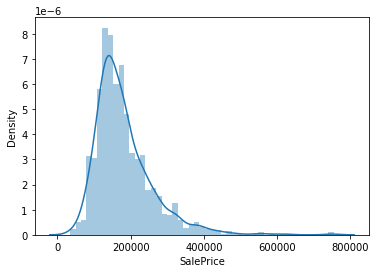

In [10]:
#Analysis on the target variable
sns.distplot(df['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


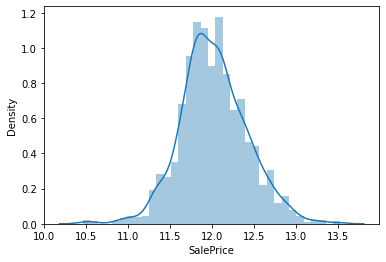

In [11]:
#Checking the sale price at log scale
log_SalePrice = np.log(df['SalePrice'])
sns.distplot(log_SalePrice)

In [8]:
#Dropping the ID column , as that will be of no use
df.drop('Id', axis = 1 , inplace =True)

In [12]:
#Handling the categorical features
cat_var = [col for col in df.columns if df[col].dtype == 'O']

#Considering MSSubClass as categorical variable
cat_var = cat_var + ['MSSubClass']

In [13]:
#Number of the categorical variables
len(cat_var)

44

In [14]:
#Cast all variables as a categorical variable
df[cat_var] = df[cat_var].astype('O')


In [18]:
#Numerical columns
num_var = [col for col in df.columns if col not in cat_var and col!='SalePrice']

#Number of numerical variables 
len(num_var)

35

In [20]:
#Variables having missing data
var_missing_values = [col for col in df.columns if df[col].isnull().sum()>0]